In [1]:
import os
os.chdir('../../../..')

In [2]:
import convokit

In [3]:
from convokit import Corpus
import pickle
import numpy as np
import os
from tensorly.decomposition import parafac
from convokit.tensors.utils import plot_factors
from sklearn.preprocessing import StandardScaler
from collections import defaultdict, Counter
from jinja2 import Environment, FileSystemLoader
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [4]:
from convokit import TensorDecomposer

In [5]:
# corpus = Corpus(filename='convokit/tensors/longreddit_construction/long-reddit-corpus-liwc-lite')
corpus = Corpus(filename='convokit/tensors/longreddit_construction/long-reddit-corpus-liwc-lite-trio')

In [6]:
import numpy as np
def _min_max_scale(mat):
    max_ = np.max(mat)
    min_ = np.min(mat)
    return (mat - min_) / (max_ - min_)

def minmax_normalize(tensor):
    tensor = tensor.copy()
    for i in range(tensor.shape[2]):
        tensor[:, :, i] = _min_max_scale(tensor[:, :, i])
    return tensor

In [49]:
cats = {'adverb', 'article', 'auxverb', 'conj', 'ipron', 'ppron', 'prep', 'quant'}
cats_present = {k+"-present" for k in cats}

In [8]:
for convo in corpus.iter_conversations():
    for idx, utt in enumerate(convo.get_chronological_utterance_list()[:20]):
        convo.meta['liwc-{}'.format(idx+1)] = {k: utt.meta[k] for k in cats_present}

In [147]:
td = TensorDecomposer(obj_type="conversation",
                      feature_set=["liwc-{}".format(i) for i in range(1, 21)],
                      group_func=lambda convo: convo.get_utterance(convo.id).meta['subreddit'],
#                       normalize_func=minmax_normalize,
                      tensor_func='tensortools-ncp-bcd',
                      rank=9
                     )

In [148]:
td.fit(corpus)

Constructing tensor...Done.
Decomposing tensor...NCP_BCD: iteration 1, objective 0.5010118857546807, improvement inf.
NCP_BCD: iteration 2, objective 0.4911572626000609, improvement 0.009854623154619824.
NCP_BCD: iteration 3, objective 0.4836156150570634, improvement 0.007541647542997465.
NCP_BCD: iteration 4, objective 0.4777182284634539, improvement 0.005897386593609499.
NCP_BCD: iteration 5, objective 0.47315719376614535, improvement 0.004561034697308564.
NCP_BCD: iteration 6, objective 0.4695732764149781, improvement 0.003583917351167254.
NCP_BCD: iteration 7, objective 0.46666526284591914, improvement 0.0029080135690589537.
NCP_BCD: iteration 8, objective 0.46420938301120623, improvement 0.002455879834712904.
NCP_BCD: iteration 9, objective 0.46207567289782975, improvement 0.0021337101133764858.
NCP_BCD: iteration 10, objective 0.4601840104087508, improvement 0.0018916624890789602.
NCP_BCD: iteration 11, objective 0.4585126608027449, improvement 0.0016713496060059008.
NCP_BCD: ite

NCP_BCD: iteration 99, objective 0.43997281901654584, improvement 1.751933800803185e-05.
NCP_BCD: iteration 100, objective 0.43995709790299387, improvement 1.57211135519697e-05.
NCP_BCD: iteration 101, objective 0.4399404245559036, improvement 1.667334709026802e-05.
NCP_BCD: iteration 102, objective 0.43992298219372566, improvement 1.7442362177932935e-05.
NCP_BCD: iteration 103, objective 0.4399057475983978, improvement 1.723459532787519e-05.
NCP_BCD: iteration 104, objective 0.43988901309144857, improvement 1.673450694922307e-05.
NCP_BCD: iteration 105, objective 0.43987202886586635, improvement 1.698422558221724e-05.
NCP_BCD: iteration 106, objective 0.43985510868743904, improvement 1.692017842730431e-05.
NCP_BCD: iteration 107, objective 0.4398383114442099, improvement 1.6797243229171865e-05.
NCP_BCD: iteration 108, objective 0.4398215747731969, improvement 1.6736671012984594e-05.
NCP_BCD: iteration 109, objective 0.43980495154594645, improvement 1.662322725043408e-05.
NCP_BCD: iter

In [25]:
from sklearn.preprocessing import Imputer, Normalizer, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_distances

In [26]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=2020, verbose=1)

In [151]:
print(td.factors[1].shape)
projected_threads = tsne.fit_transform(td.factors[1])
print(projected_threads.shape)

(1183, 9)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1183 samples in 0.001s...
[t-SNE] Computed neighbors for 1183 samples in 0.041s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1183
[t-SNE] Computed conditional probabilities for sample 1183 / 1183
[t-SNE] Mean sigma: 0.047274
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.123886
[t-SNE] KL divergence after 1000 iterations: 1.432769
(1183, 2)


In [14]:
import matplotlib.pyplot as plt

In [15]:
import random

In [13]:
for convo in corpus.iter_conversations():
    for idx, utt in enumerate(convo.get_chronological_utterance_list()):
        utt.meta['order'] = idx+1

In [17]:
for convo in corpus.iter_conversations():
    convo.meta['subreddit'] = convo.get_utterance(convo.id).meta['subreddit']

In [153]:
convo_ids = [convo.id for convo in corpus.iter_conversations()]

In [58]:
convo_df = corpus.get_conversations_dataframe()

In [59]:
convo_df_sub = convo_df[['meta.subreddit']]

In [163]:
xs = [x for (x, y) in projected_threads]
ys = [y for (x, y) in projected_threads]

In [179]:
convo_df_sub['x'] = xs
convo_df_sub['y'] = ys

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
colors = { 
    'DebateReligion': sns.light_palette('green')[4],
    'asoiaf': sns.light_palette('blue')[4],
    'WTF': sns.light_palette('red')[4]
}

In [46]:
from matplotlib.patches import Patch

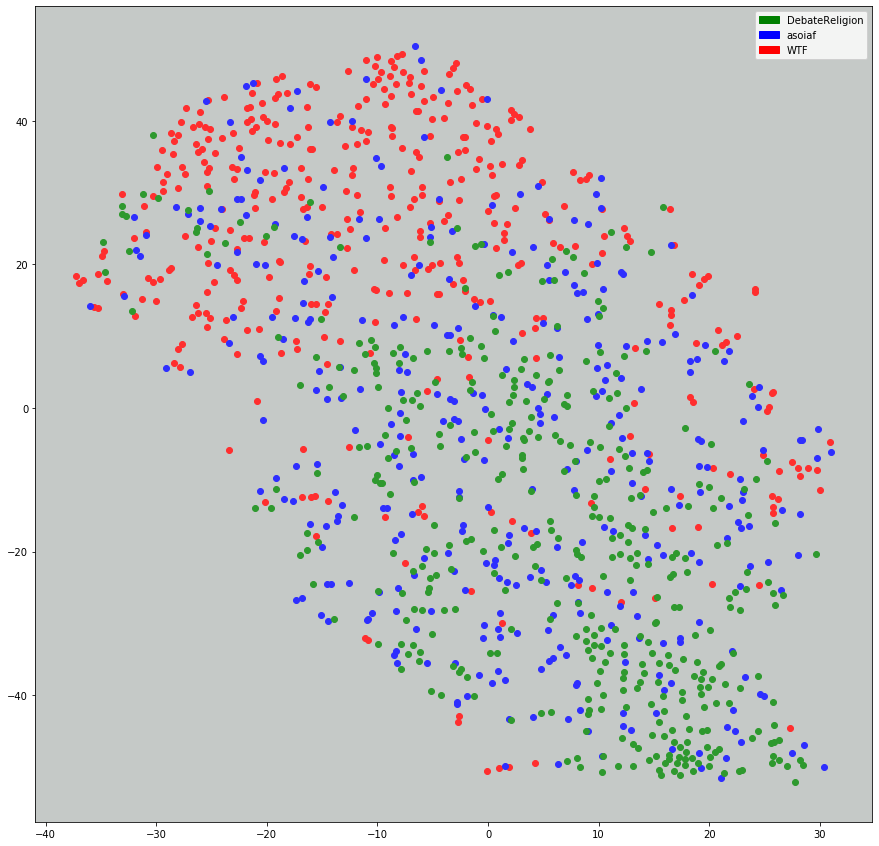

In [186]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot()
ax.set_facecolor('xkcd:silver')

for idx in range(len(convo_df_sub)):
    r = convo_df_sub.iloc[idx]
    ax.scatter(r['x'], r['y'], c=colors[r['meta.subreddit']].reshape(1, -1))
# for i in range(td_min_max.factors[1].shape[0]):
#     if random.random() < 0.1:
#         ax.(corpus.get_conversation(convo_ids[i]).meta['group'], (projected_threads[i][0], projected_threads[i][1]))
legend_elements = [Patch(facecolor='Green', edgecolor='g', label='DebateReligion'),
                   Patch(facecolor='Blue', edgecolor='b', label='asoiaf'),
                   Patch(facecolor='Red', edgecolor='r', label='WTF')
                  ]
# Create the figure
ax.legend(handles=legend_elements)
plt.show()

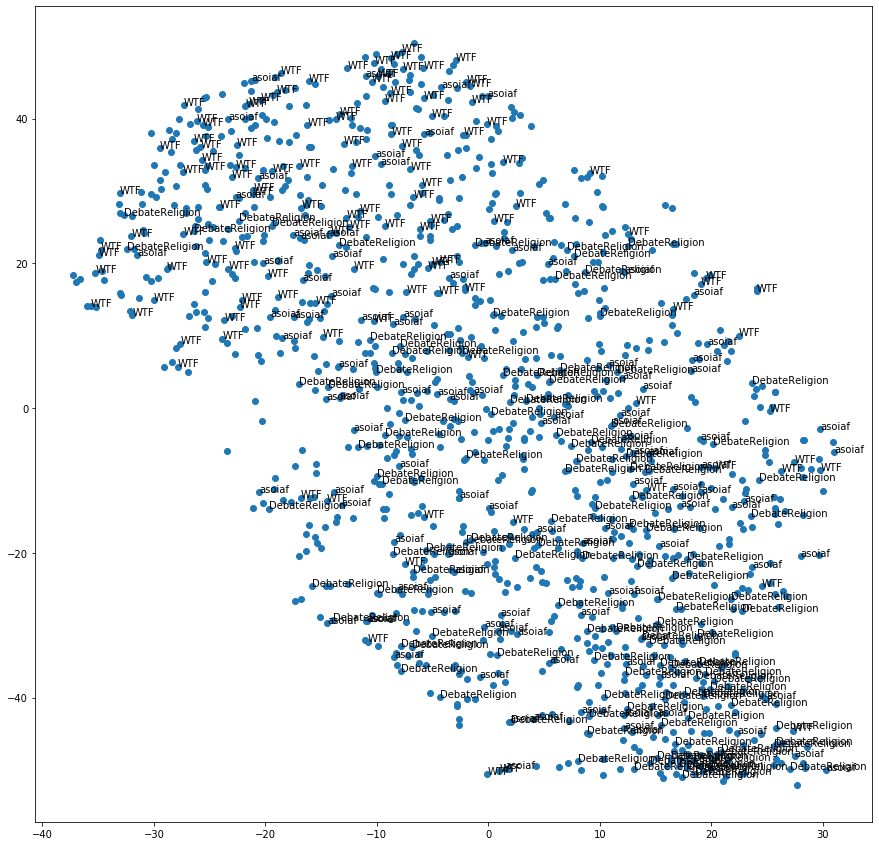

In [155]:
plt.figure(figsize=(15,15))
plt.scatter(projected_threads[:,0], projected_threads[:, 1])

for i in range(td.factors[1].shape[0]):
    if random.random() < 0.3:
        plt.annotate(corpus.get_conversation(convo_ids[i]).meta['subreddit'], (projected_threads[i][0], projected_threads[i][1]))
    
plt.show()

Report generated at convokit/tensor_decomposer/reports/liwc-TCA-trio/report.html


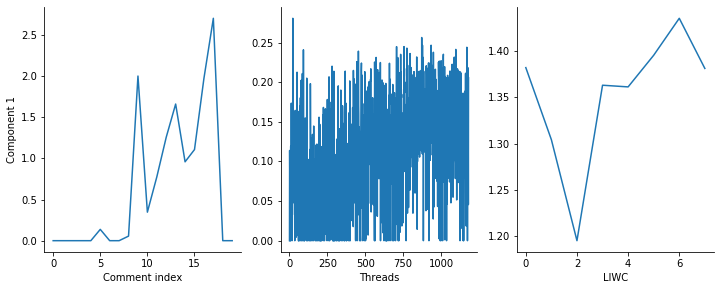

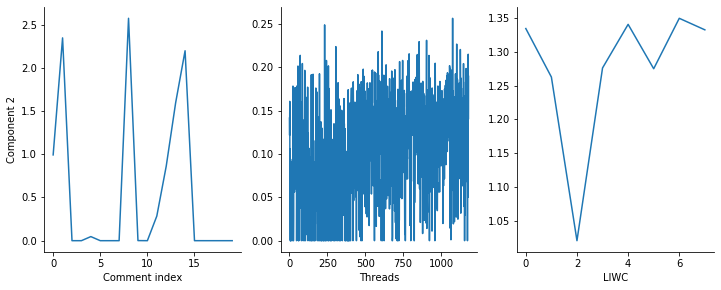

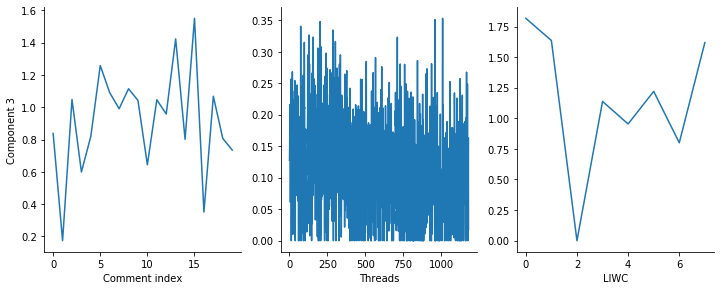

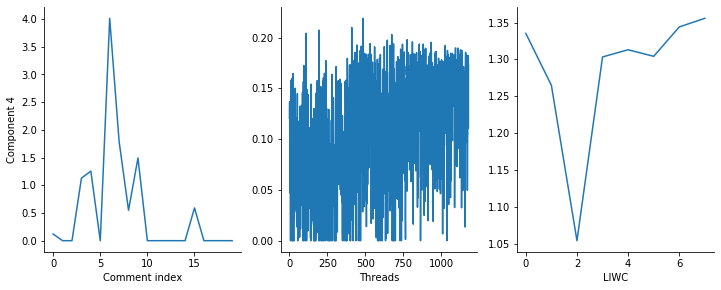

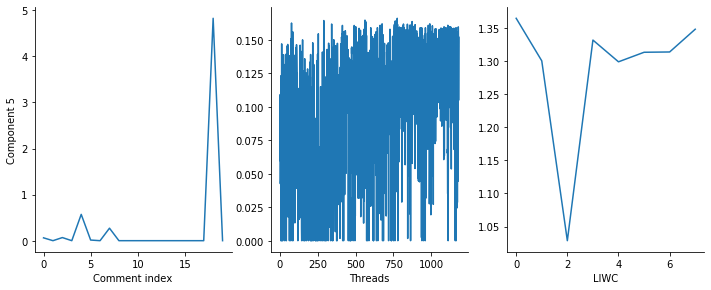

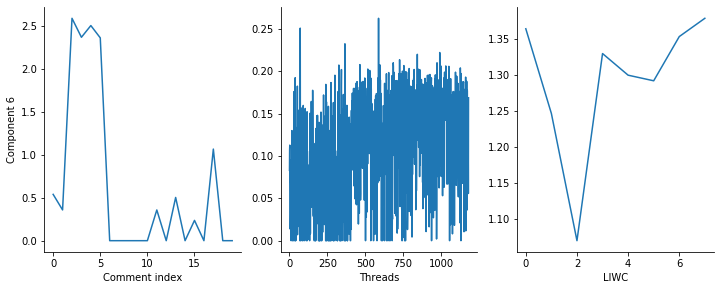

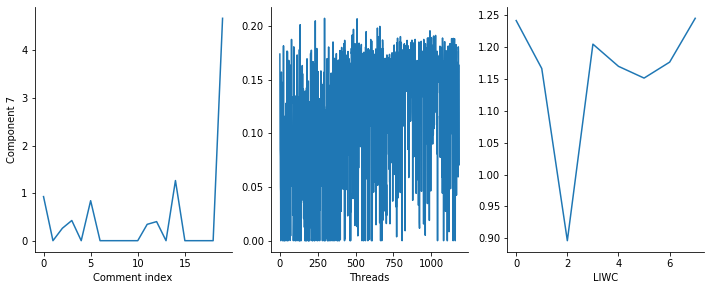

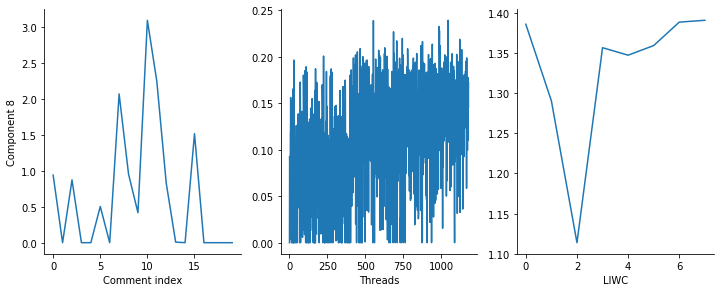

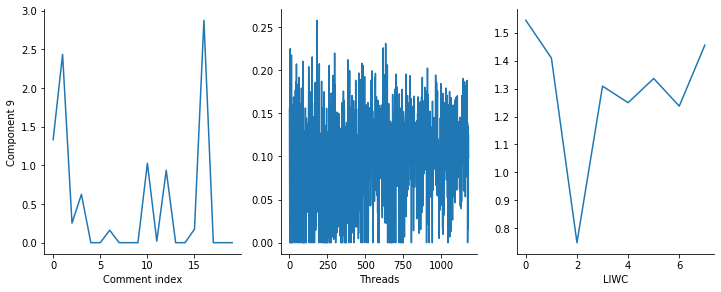

In [156]:
td.summarize(corpus, axis_names=['Comment index', 'Threads', 'LIWC'], 
            output_dir='convokit/tensor_decomposer/reports/liwc-TCA-trio', liwc=True)

## Data summary

In [6]:
for utt in corpus.iter_utterances():
    utt.meta['length'] = len(utt.text)

In [15]:
utt_df = corpus.get_utterances_dataframe()

In [16]:
dtype_dict = dict()
for col in utt_df.columns:
    if 'meta' in col and 'present' in col:
        dtype_dict[col] = 'int32'
    if 'length' in col:
        dtype_dict[col] = 'int32'

In [17]:
dtype_dict['meta.order'] = 'int32'

In [18]:
import pandas as pd

In [19]:
utt_df_20 = utt_df[utt_df['meta.order'].isin(range(1, 21))]

In [20]:
utt_df_20 = utt_df_20.astype(dtype_dict)

In [21]:
utt_df_20.groupby('meta.subreddit').mean()

,meta.adverb-present,meta.article-present,meta.auxverb-present,meta.conj-present,meta.ipron-present,meta.length,meta.order,meta.ppron-present,meta.prep-present,meta.quant-present
meta.subreddit,,,,,,,,,,
DebateReligion,0.831611,0.839663,0.946755,0.844231,0.884615,482.848437,10.5,0.874760,0.910216,0.598798
WTF,0.519608,0.560294,0.681863,0.476716,0.566667,109.863358,10.5,0.618995,0.661765,0.268995
asoiaf,0.723259,0.761978,0.862256,0.734819,0.725627,288.792618,10.5,0.799721,0.836769,0.491086


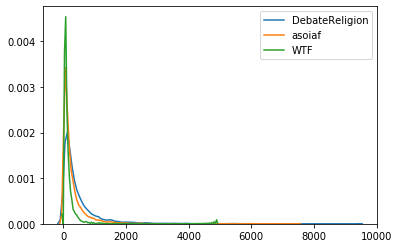

In [23]:
%matplotlib inline
sns.distplot(utt_df_20[utt_df_20['meta.subreddit']=='DebateReligion'][['meta.length']], hist=False, label='DebateReligion')
sns.distplot(utt_df_20[utt_df_20['meta.subreddit']=='asoiaf'][['meta.length']], hist=False, label='asoiaf')
sns.distplot(utt_df_20[utt_df_20['meta.subreddit']=='WTF'][['meta.length']], hist=False, label='WTF')


## What if we did a TSNE using the average values per conversation?

In [27]:
tsne_avg = TSNE(random_state=2018)

In [28]:
vals = utt_df_20.groupby('conversation_id').mean()[[c for c in utt_df_20.columns if 'present' in c]]

In [30]:
tsne_df = pd.DataFrame(data=tsne_avg.fit_transform(vals.values),
                      index=vals.index)

In [33]:
tsne_df['x'] = tsne_df[0]
tsne_df['y'] = tsne_df[1]

In [36]:
tsne_df = tsne_df[['x', 'y']]

In [38]:
convo_df = corpus.get_conversations_dataframe()

In [42]:
tsne_df['subreddit'] = convo_df['meta.subreddit']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
tsne_df

,x,y,subreddit
conversation_id,,,
dnqpbsd,-3.245139,-36.147083,WTF
dnrsugt,15.430261,17.783672,asoiaf
dns5my5,9.822075,33.710011,asoiaf
dnvdf36,12.796692,61.365417,DebateReligion
dnvn9yz,-23.153450,-31.849249,asoiaf
dnvr2v2,15.903642,4.761791,asoiaf
dnvwd3c,-3.413281,-10.039856,asoiaf
dnwzv6i,-0.185296,33.726048,asoiaf
dnyns7c,24.256239,30.039633,asoiaf


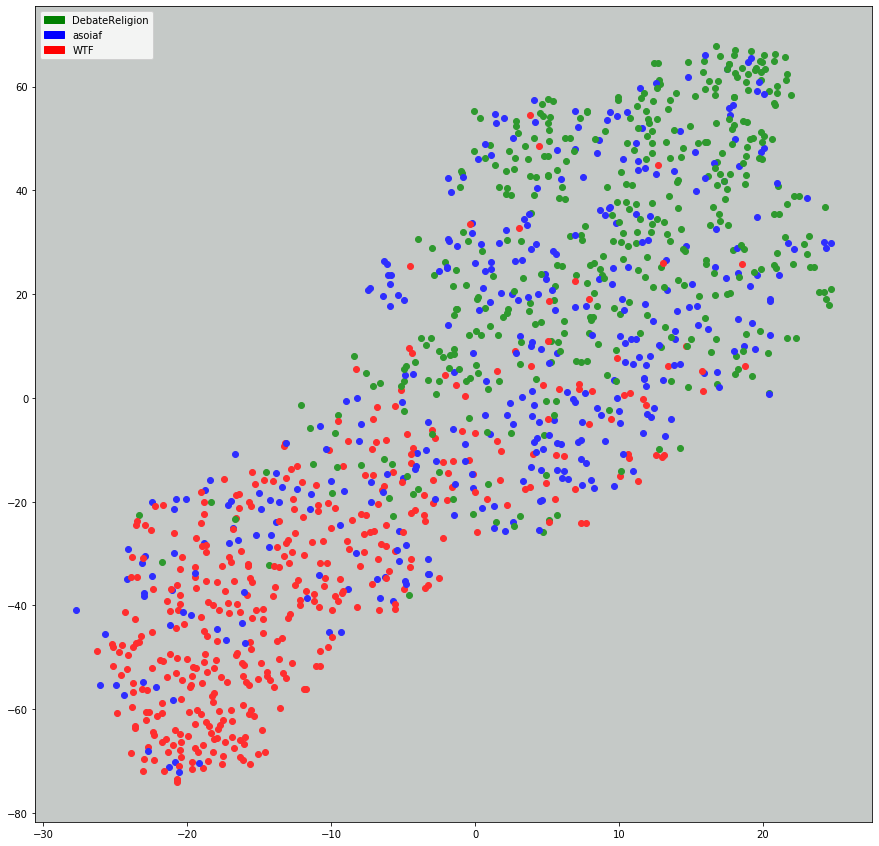

In [48]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot()
ax.set_facecolor('xkcd:silver')

for idx in range(len(tsne_df)):
    r = tsne_df.iloc[idx]
    ax.scatter(r['x'], r['y'], c=colors[r['subreddit']].reshape(1, -1))
# for i in range(td_min_max.factors[1].shape[0]):
#     if random.random() < 0.1:
#         ax.(corpus.get_conversation(convo_ids[i]).meta['group'], (projected_threads[i][0], projected_threads[i][1]))
legend_elements = [Patch(facecolor='Green', edgecolor='g', label='DebateReligion'),
                   Patch(facecolor='Blue', edgecolor='b', label='asoiaf'),
                   Patch(facecolor='Red', edgecolor='r', label='WTF')
                  ]
# Create the figure
ax.legend(handles=legend_elements)
plt.show()

## Using normalized LIWC features

In [50]:
for convo in corpus.iter_conversations():
    for idx, utt in enumerate(convo.get_chronological_utterance_list()[:20]):
        convo.meta['liwc-{}'.format(idx+1)] = {k: utt.meta[k] for k in cats}

td = TensorDecomposer(obj_type="conversation",
                      feature_set=["liwc-{}".format(i) for i in range(1, 21)],
                      group_func=lambda convo: convo.get_utterance(convo.id).meta['subreddit'],
#                       normalize_func=minmax_normalize,
                      tensor_func='tensortools-ncp-bcd',
                      rank=9
                     )

In [52]:
td.fit(corpus)

Constructing tensor...Done.
Decomposing tensor...NCP_BCD: iteration 1, objective 0.6640296247451677, improvement inf.
NCP_BCD: iteration 2, objective 0.6556717687604783, improvement 0.00835785598468941.
NCP_BCD: iteration 3, objective 0.6518497612825669, improvement 0.0038220074779113933.
NCP_BCD: iteration 4, objective 0.6486204269613374, improvement 0.0032293343212295156.
NCP_BCD: iteration 5, objective 0.6457556231944925, improvement 0.0028648037668448367.
NCP_BCD: iteration 6, objective 0.643099368599586, improvement 0.002656254594906482.
NCP_BCD: iteration 7, objective 0.6405318382630634, improvement 0.002567530336522683.
NCP_BCD: iteration 8, objective 0.6380506924936828, improvement 0.0024811457693805217.
NCP_BCD: iteration 9, objective 0.635755352465649, improvement 0.0022953400280338876.
NCP_BCD: iteration 10, objective 0.6338528951279648, improvement 0.001902457337684127.
NCP_BCD: iteration 11, objective 0.6323582112080983, improvement 0.001494683919866513.
NCP_BCD: iteration

NCP_BCD: iteration 107, objective 0.6170246076044426, improvement 1.447252216402184e-05.
NCP_BCD: iteration 108, objective 0.6170097010603712, improvement 1.4906544071324745e-05.
NCP_BCD: iteration 109, objective 0.6169943192542562, improvement 1.5381806115044583e-05.
NCP_BCD: iteration 110, objective 0.61697862083999, improvement 1.5698414266185345e-05.
NCP_BCD: iteration 111, objective 0.616962958014252, improvement 1.566282573794986e-05.
NCP_BCD: iteration 112, objective 0.6169472790411761, improvement 1.5678973075972102e-05.
NCP_BCD: iteration 113, objective 0.6169307670689389, improvement 1.6511972237176487e-05.
NCP_BCD: iteration 114, objective 0.6169134851001739, improvement 1.7281968765048283e-05.
NCP_BCD: iteration 115, objective 0.6168956487221938, improvement 1.783637798002946e-05.
NCP_BCD: iteration 116, objective 0.6168772979107487, improvement 1.8350811445078108e-05.
NCP_BCD: iteration 117, objective 0.6168585729603643, improvement 1.8724950384463313e-05.
NCP_BCD: iterati

Report generated at convokit/tensor_decomposer/reports/liwc-TCA-trio-normalized/report.html


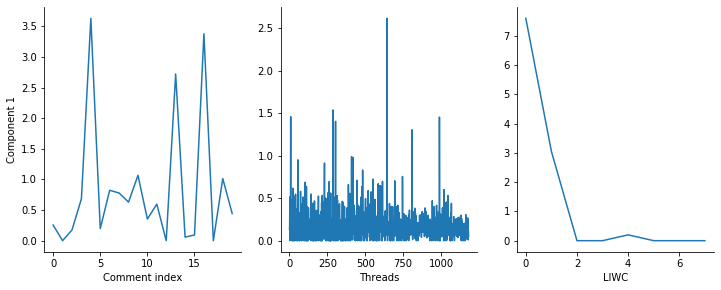

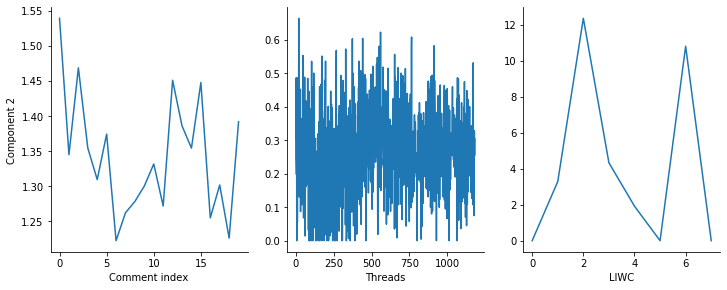

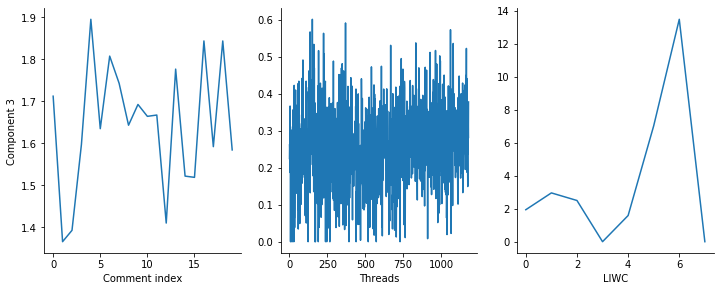

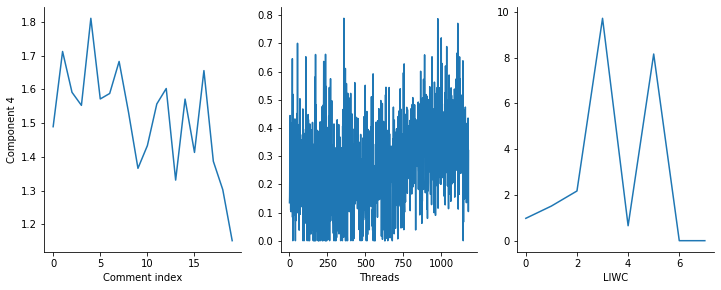

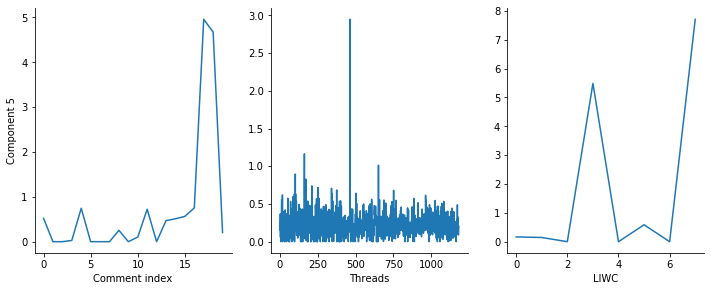

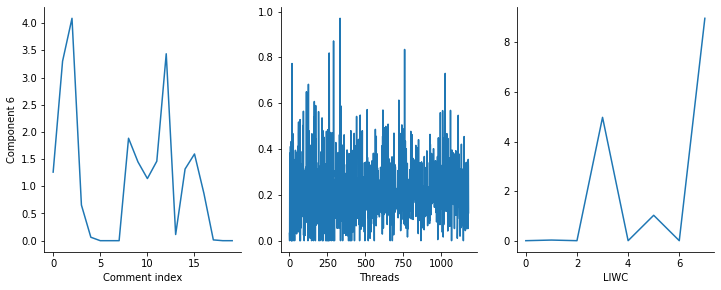

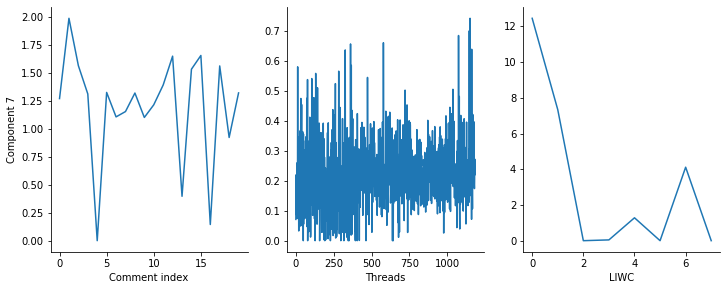

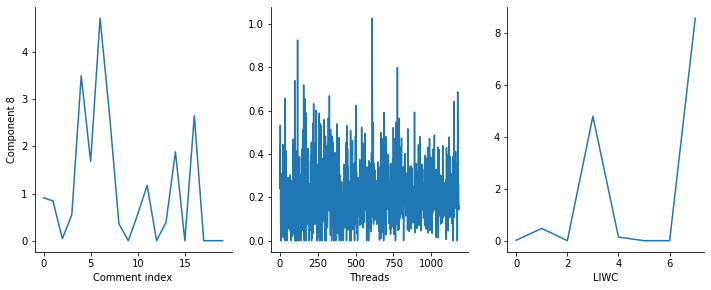

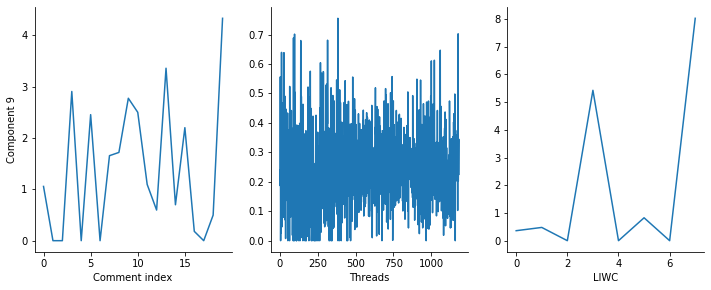

In [53]:
td.summarize(corpus, axis_names=['Comment index', 'Threads', 'LIWC'], 
            output_dir='convokit/tensor_decomposer/reports/liwc-TCA-trio-normalized', liwc=True)

In [54]:
print(td.factors[1].shape)
projected_threads = tsne.fit_transform(td.factors[1])
print(projected_threads.shape)

(1183, 9)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1183 samples in 0.001s...
[t-SNE] Computed neighbors for 1183 samples in 0.045s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1183
[t-SNE] Computed conditional probabilities for sample 1183 / 1183
[t-SNE] Mean sigma: 0.113859
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.023285
[t-SNE] KL divergence after 1000 iterations: 1.790138
(1183, 2)


In [55]:
xs = [x for (x, y) in projected_threads]
ys = [y for (x, y) in projected_threads]

In [56]:
convo_ids = [convo.id for convo in corpus.iter_conversations()]

In [62]:
convo_df_sub['x'] = xs
convo_df_sub['y'] = ys

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


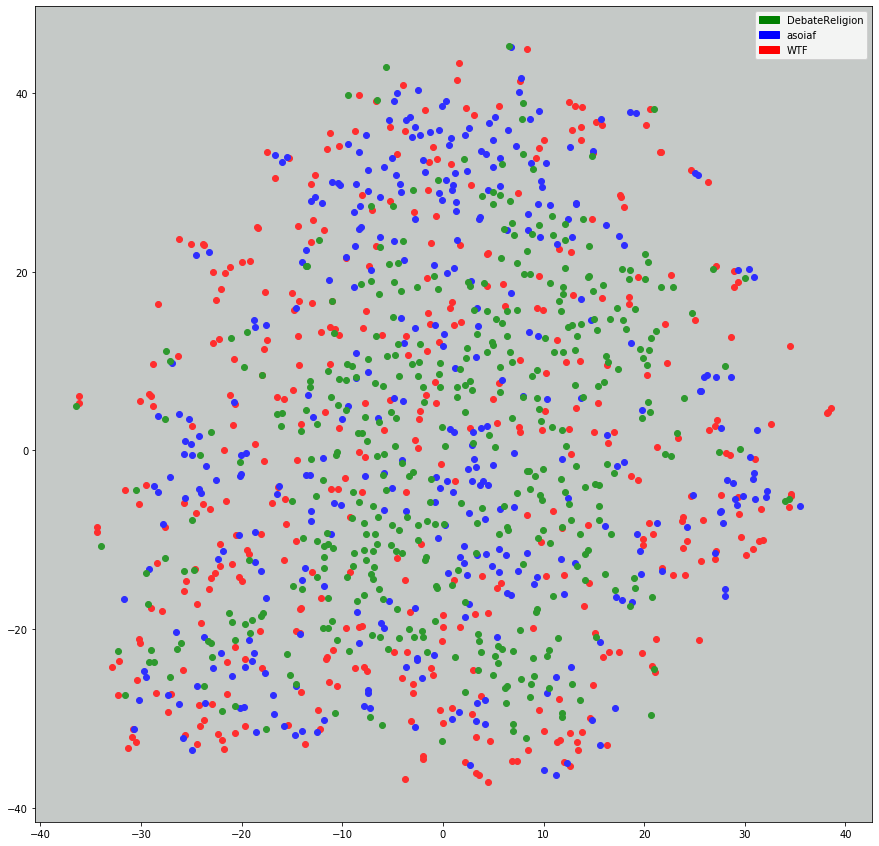

In [64]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot()
ax.set_facecolor('xkcd:silver')

for idx in range(len(convo_df_sub)):
    r = convo_df_sub.iloc[idx]
    ax.scatter(r['x'], r['y'], c=colors[r['meta.subreddit']].reshape(1, -1))
# for i in range(td_min_max.factors[1].shape[0]):
#     if random.random() < 0.1:
#         ax.(corpus.get_conversation(convo_ids[i]).meta['group'], (projected_threads[i][0], projected_threads[i][1]))
legend_elements = [Patch(facecolor='Green', edgecolor='g', label='DebateReligion'),
                   Patch(facecolor='Blue', edgecolor='b', label='asoiaf'),
                   Patch(facecolor='Red', edgecolor='r', label='WTF')
                  ]
# Create the figure
ax.legend(handles=legend_elements)
plt.show()

In [69]:
utt_df_sub = utt_df[["meta."+c for c in cats] + ['meta.subreddit']]

In [73]:
dtype_dict = {c: 'float64' for c in utt_df_sub.columns if 'subreddit' not in c}

In [76]:
utt_df_sub.astype(dtype_dict).groupby('meta.subreddit').mean()

,meta.adverb,meta.conj,meta.article,meta.auxverb,meta.quant,meta.ipron,meta.prep,meta.ppron
meta.subreddit,,,,,,,,
DebateReligion,5.847798,6.537856,6.385058,11.924729,2.140150,8.049880,11.273042,8.480813
WTF,5.797487,4.600238,6.107567,9.389675,1.815728,6.711101,9.677981,8.232306
asoiaf,5.818617,6.109079,6.675361,10.571464,2.198755,6.004138,10.943067,8.442030


In [134]:
utt_df_20_mean = utt_df_20.groupby('meta.order').mean()

In [132]:
import seaborn as sns

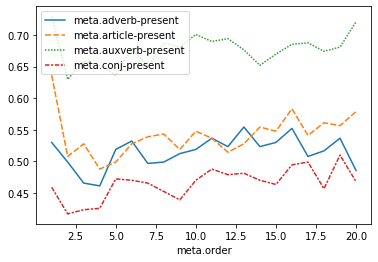

In [144]:
sns.lineplot(data=utt_df_20_mean[utt_df_20_mean.columns[:4]])

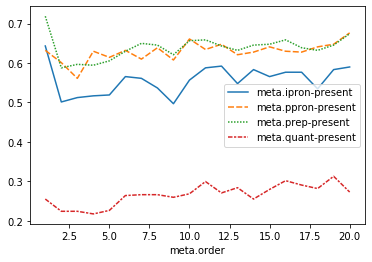

In [145]:
sns.lineplot(data=utt_df_20_mean[utt_df_20_mean.columns[4:]])

In [49]:
utt_df.astype({'meta.adverb': 'int32'}).dtypes

ValueError: cannot convert float NaN to integer

In [41]:
utt_df.dtypes

timestamp                 object
text                      object
speaker                   object
reply_to                  object
conversation_id           object
meta.adverb               object
meta.adverb-present       object
meta.article              object
meta.article-present      object
meta.author_flair_text    object
meta.auxverb              object
meta.auxverb-present      object
meta.conj                 object
meta.conj-present         object
meta.ipron                object
meta.ipron-present        object
meta.order                object
meta.permalink            object
meta.ppron                object
meta.ppron-present        object
meta.prep                 object
meta.prep-present         object
meta.quant                object
meta.quant-present        object
meta.retrieved_on         object
meta.score                object
meta.subreddit            object
meta.top_level_comment    object
dtype: object

In [37]:
utt_df.groupby('meta.order').mean()

DataError: No numeric types to aggregate

In [21]:
input()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 885, in _input_request
    ident, reply = self.session.recv(self.stdin_socket, 0)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/jupyter_client/session.py", line 803, in recv
    msg_list = socket.recv_multipart(mode, copy=copy)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/zmq/sugar/socket.py", line 470, in recv_multipart
    parts = [self.recv(flags, copy=copy, track=track)]
  File "zmq/backend/cython/socket.pyx", line 788, in zmq.backend.cython.socket.Socket.recv
  File "zmq/backend/cython/socket.pyx", line 824, in zmq.backend.cython.socket.Socket.recv
  File "zmq/backend/cython/socket.pyx", line 186, in zmq.backend.cython.socket._recv_copy
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt

During h

TypeError: can only concatenate str (not "list") to str

In [ ]:
corpus.random_conversation().meta

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(projected_threads[:,0], projected_threads[:, 1])

for i in range(td_min_max.factors[1].shape[0]):
    if random.random() < 0.15:
        plt.annotate(convo_ids[i], (projected_threads[i][0], projected_threads[i][1]))
    
plt.show()

### tracing the reverse C curve

In [ ]:
corpus.get_conversation('482-1').print_conversation_structure(lambda utt: str(utt.meta['order'] + 1) + ". " + utt.speaker.id)

In [ ]:
corpus.get_conversation('351-1').print_conversation_structure(lambda utt: str(utt.meta['order'] + 1) + ". " + utt.speaker.id)

In [ ]:
corpus.get_conversation('515-1').print_conversation_structure(lambda utt: str(utt.meta['order'] + 1) + ". " + utt.speaker.id)

In [ ]:
corpus.get_conversation('354-1').print_conversation_structure(lambda utt: str(utt.meta['order'] + 1) + ". " + utt.speaker.id)

In [ ]:
corpus.get_conversation('525-1').print_conversation_structure(lambda utt: str(utt.meta['order'] + 1) + ". " + utt.speaker.id)

In [ ]:
corpus.get_conversation('685-1').print_conversation_structure(lambda utt: str(utt.meta['order'] + 1) + ". " + utt.speaker.id)

In [ ]:
corpus.get_conversation('905-1').print_conversation_structure(lambda utt: str(utt.meta['order'] + 1) + ". " + utt.speaker.id)

In [ ]:
corpus.get_conversation('669-1').print_conversation_structure(lambda utt: str(utt.meta['order'] + 1) + ". " + utt.speaker.id)

In [ ]:
# in the ball
corpus.get_conversation('768-1').print_conversation_structure(lambda utt: str(utt.meta['order'] + 1) + ". " + utt.speaker.id)

## What if we focus further specifically on the positive / negative threads only?

Since these might be most striking and therefore give us a more separated TSNE.

In [ ]:
from collections import defaultdict, Counter

In [ ]:
anomaly_threshold = 1.5

In [ ]:
def get_anomalous_points(factor_full, idx):
    scaler = StandardScaler()
    factor = factor_full[:, idx]
    reshaped = factor.reshape((factor.shape[0], 1))
    scaled = scaler.fit_transform(reshaped)
    pos_pts = np.argwhere(scaled.reshape(factor.shape[0]) > anomaly_threshold).flatten()
    neg_pts = np.argwhere(scaled.reshape(factor.shape[0]) < -anomaly_threshold).flatten()
    return pos_pts, neg_pts

def generate_high_level_summary():
    # generate_plots()
    with open(os.path.join(DATA_DIR, 'rank_to_factors.p'), 'rb') as f:
        rank_to_factors = pickle.load(f)

    with open(os.path.join(DATA_DIR, 'hg_features.p'), 'rb') as f:
        liwc_features = pickle.load(f)

    with open(os.path.join(DATA_DIR, 'subreddits.p'), 'rb') as f:
        subreddits = pickle.load(f)

    time_factor = rank_to_factors[max_rank][0] # (9, 9)
    thread_factor = rank_to_factors[max_rank][1] # (10000, 9)
    feature_factor = rank_to_factors[max_rank][2] # (140, 9)
    idx_to_distinctive_threads = defaultdict(dict)
    idx_to_distinctive_features = defaultdict(dict)

    # normalizing
    subreddit_totals = Counter(subreddits)
    for idx in range(max_rank):
        pos_thread_pts, neg_thread_pts = get_anomalous_points(thread_factor, idx)
        idx_to_distinctive_threads[idx]['pos_threads'] = pos_thread_pts
        idx_to_distinctive_threads[idx]['neg_threads'] = neg_thread_pts

        pos_features, neg_features = get_anomalous_points(feature_factor, idx)
        idx_to_distinctive_features[idx]['pos_features'] = pos_features
        idx_to_distinctive_features[idx]['neg_features'] = neg_features

    return idx_to_distinctive_threads, idx_to_distinctive_features 

In [ ]:
idx_to_distinctive_threads, idx_to_distinctive_features = generate_high_level_summary()

In [ ]:
for factor_idx, threads in idx_to_distinctive_threads.items():
    print("Factor {}".format(factor_idx+1))
    print("Number of pos threads: {}".format(len(threads['pos_threads'])))
    print("Number of neg threads: {}".format(len(threads['neg_threads'])))
    print("Positive feats: {}".format(idx_to_distinctive_features[factor_idx]['pos_features']))
    print("Negative feats: {}".format(idx_to_distinctive_features[factor_idx]['neg_features']))
    print()

In [ ]:
included_threads = set()

for factor_idx, threads in idx_to_distinctive_threads.items():
    included_threads = included_threads.union(set(threads['pos_threads'])).union(threads['neg_threads'])

In [ ]:
len(included_threads)

In [ ]:
included_threads = sorted(included_threads)

In [ ]:
factors[1][included_threads].shape

In [ ]:
projected_threads = tsne.fit_transform(factors[1][included_threads])
print(projected_threads.shape)

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(projected_threads[:,0], projected_threads[:, 1])

for i in range(len(included_threads)):
    if random.random() < 0.7:
        plt.annotate(corpus.get_utterance(convo_ids[included_threads[i]]).meta['subreddit'][0], (projected_threads[i][0], projected_threads[i][1]))
    
plt.show()

## What if we did it with static hyperconvo features?

In [ ]:
import pandas as pd

In [ ]:
hc = convokit.HyperConvo(prefix_len=20)

In [ ]:
hc.transform(corpus)

In [ ]:
threads_feats = dict()

for convo in corpus.iter_conversations():
    threads_feats[convo.id] = convo.meta['hyperconvo']
    
def clean_value(x):
    if np.isinf(x) or np.isnan(x):
        return -1
    return x

In [ ]:
feat_names = list(next(iter(threads_feats.values())).keys())

In [ ]:
thread_ids = []
feats = []
for key, feat_dict in threads_feats.items():
    thread_ids.append(key)
    feats.append([clean_value(feat_dict[k]) for k in feat_names])

In [ ]:
feat_df = pd.DataFrame(data=feats, index=thread_ids, columns=feat_names)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
feat_mtx = SimpleImputer(missing_values=-1).fit_transform(feat_df.values)
feat_mtx = StandardScaler().fit_transform(feat_mtx)

In [ ]:
svd = TruncatedSVD(n_components=3, algorithm='arpack') # deals with an issue where the randomized alg hangs
svd.fit(feat_mtx)
U, s, V = svd.transform(feat_mtx) / svd.singular_values_, \
        svd.singular_values_, \
        svd.components_.T

In [ ]:
U_norm = Normalizer().fit_transform(U)
V_norm = Normalizer().fit_transform(V)
U_df = pd.DataFrame(data=U_norm, index=feat_df.index)
V_df = pd.DataFrame(data=V_norm, index=feat_names)

In [ ]:
tsne_hc = TSNE(random_state=2018)
tsne_hc_df = pd.DataFrame(data=tsne_hc.fit_transform(feat_df.values),
                      index=feat_df.index)

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(tsne_hc_df[0].values, tsne_hc_df[1].values)
for i, txt in enumerate(tsne_hc_df.index):
    if random.random() < 0.5:
        plt.annotate(corpus.get_utterance(txt).meta['subreddit'][0], (tsne_hc_df.values[i,0], tsne_hc_df.values[i,1]))
plt.show()